#### Task (class ‘C’):

    Study the behaviour of global graph indices in function of network density (see
    point 1.3 for density values).

#### Importing the routine libraries

In [1]:
import sys
sys.path.insert(0, '../Lib')
import homeworkLib as hwl
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Loading our graphs from question 1.3

In [2]:
with open("../Pickle/EO_1_13.file", "rb") as f:
    EO_1 = pickle.load(f)
with open("../Pickle/EO_5_13.file", "rb") as f:
    EO_5 = pickle.load(f)
with open("../Pickle/EO_10_13.file", "rb") as f:
    EO_10 = pickle.load(f)
with open("../Pickle/EO_20_13.file", "rb") as f:
    EO_20 = pickle.load(f)
with open("../Pickle/EO_30_13.file", "rb") as f:
    EO_30 = pickle.load(f)
with open("../Pickle/EO_50_13.file", "rb") as f:
    EO_50 = pickle.load(f)
    
with open("../Pickle/EC_1_13.file", "rb") as f:
    EC_1 = pickle.load(f)
with open("../Pickle/EC_5_13.file", "rb") as f:
    EC_5 = pickle.load(f)
with open("../Pickle/EC_10_13.file", "rb") as f:
    EC_10 = pickle.load(f)
with open("../Pickle/EC_20_13.file", "rb") as f:
    EC_20 = pickle.load(f)
with open("../Pickle/EC_30_13.file", "rb") as f:
    EC_30 = pickle.load(f)
with open("../Pickle/EC_50_13.file", "rb") as f:
    EC_50 = pickle.load(f)

### Functions definition

In [3]:
# this  funtion computes the average shortest path for all the graphs returning infinity for uconnected ones
def average_shortest_path_length_for_all(G):
    try:
        # Normal case, the graph is connected 
        return nx.average_shortest_path_length(G);
    except:
        return np.infty

### Now let's study the behaviour of global graph indices in function of network density

#### Eyes-opened case

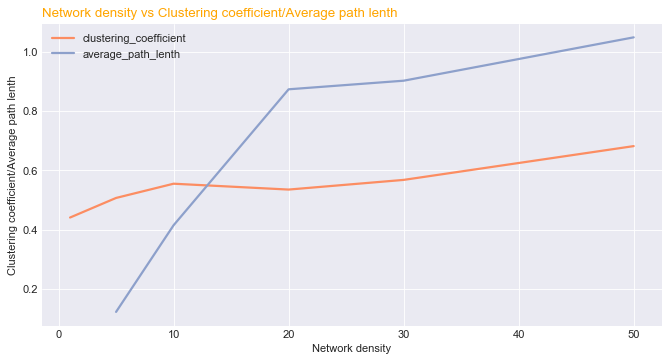

In [4]:
net_densities = [1, 5, 10, 20, 30, 50]
clustering_coefficients = [nx.average_clustering(EO_1.dtf_graph), nx.average_clustering(EO_5.dtf_graph),
                          nx.average_clustering(EO_10.dtf_graph), nx.average_clustering(EO_20.dtf_graph),
                          nx.average_clustering(EO_30.dtf_graph), nx.average_clustering(EO_50.dtf_graph)]
path_lenths = [average_shortest_path_length_for_all(EO_1.dtf_graph), average_shortest_path_length_for_all(EO_5.dtf_graph),
               average_shortest_path_length_for_all(EO_10.dtf_graph), average_shortest_path_length_for_all(EO_20.dtf_graph),
               average_shortest_path_length_for_all(EO_30.dtf_graph), average_shortest_path_length_for_all(EO_50.dtf_graph)]
 
# Make a data frame
df=pd.DataFrame({'network_density': np.asarray(net_densities), 
                 'clustering_coefficient': np.asarray(clustering_coefficients),
                 'average_path_lenth': np.asarray(path_lenths)
                 })
 
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set2')
 
# multiple line plot
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
num=0
for column in df.drop('network_density', axis=1):
    num+=1
    plt.plot(df['network_density'], df[column], marker='', color=palette(num), linewidth=2, alpha=1, label=column)
 
# Add legend
plt.legend(loc=0, ncol=1)
 
# Add titles
plt.title("Network density vs Clustering coefficient/Average path lenth", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Network density")
plt.ylabel("Clustering coefficient/Average path lenth")
plt.savefig('../../Images/Q2_4_Network_density_vs_global_graph_indices_eyes_opened')
plt.show()

From figure N°... it appeared that with the increae of the network density, we were also able to observe an increase of both the global graph indices (clustering coefficients / average path length). The increase in the clustering coefficient case was constant, ranging between 0.4 and 0.7 for network density values ranging btween 0 and 50. In the average path lenth case instead, the increase wasn't quite constant; we observed a rapid increase before density value of 20 after what the behaviour became similar that of the clustering coefficient. In this last case, the values of network density were still choosen in the range 0-50. We registered path lenth values going from 0 to 1.1. Thus in the case of our study, if one wishes to increase the global graph indices, a good way of doing so could be increasing the network density.

#### Eyes-closed case

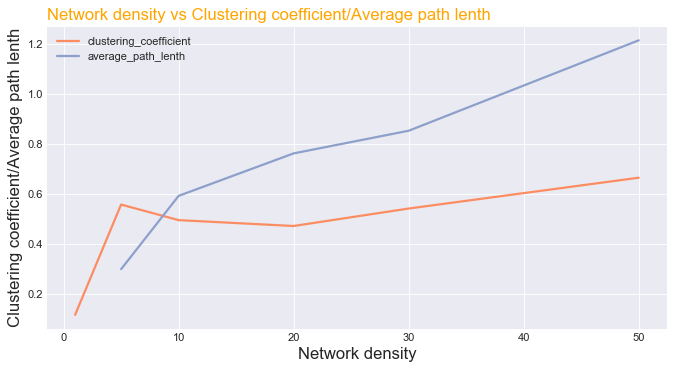

In [5]:
net_densities = [1, 5, 10, 20, 30, 50]
clustering_coefficients = [nx.average_clustering(EC_1.dtf_graph), nx.average_clustering(EC_5.dtf_graph),
                          nx.average_clustering(EC_10.dtf_graph), nx.average_clustering(EC_20.dtf_graph),
                          nx.average_clustering(EC_30.dtf_graph), nx.average_clustering(EC_50.dtf_graph)]
path_lenths = [average_shortest_path_length_for_all(EC_1.dtf_graph), average_shortest_path_length_for_all(EC_5.dtf_graph),
               average_shortest_path_length_for_all(EC_10.dtf_graph), average_shortest_path_length_for_all(EC_20.dtf_graph),
               average_shortest_path_length_for_all(EC_30.dtf_graph), average_shortest_path_length_for_all(EC_50.dtf_graph)]
 
# Make a data frame
df=pd.DataFrame({'network_density': np.asarray(net_densities), 
                 'clustering_coefficient': np.asarray(clustering_coefficients),
                 'average_path_lenth': np.asarray(path_lenths)
                 })
 
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set2')
 
# multiple line plot
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
num=0
for column in df.drop('network_density', axis=1):
    num+=1
    plt.plot(df['network_density'], df[column], marker='', color=palette(num), linewidth=2, alpha=1, label=column)
 
# Add legend
plt.legend(loc=0, ncol=1)
 
# Add titles
plt.title("Network density vs Clustering coefficient/Average path lenth", loc='left', fontsize=15, fontweight=1, color='orange')
plt.xlabel("Network density", fontsize=15, fontweight=1)
plt.ylabel("Clustering coefficient/Average path lenth", fontsize=15, fontweight=1)
plt.savefig('../../Images/Q2_4_Network_density_vs_global_graph_indices_eyes_closed')
plt.show()

The eyes-closed case appeared to be very similar to the eyes-opened case by the fact that even here, the global graph indices increse while the increase of the network density. the only thing to point out here is the slight decrement we could observe between network density of 5 and 20. Ergo, to obtain a graph with a considerably high clustring coefficient, it would be better to choose a values greater to 20 as adjacency matrix density. 